In [279]:
import re
import pandas as pd
import numpy as np
# from mlutils import dataset, connector
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm 
import seaborn as sns
import pylab as py 
warnings.filterwarnings('ignore')
%matplotlib inline

In [264]:
df = pd.read_csv('vehicles.csv')

In [265]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [266]:
df.shape

(539759, 25)

In [267]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
dtype: object

In [268]:
df.columns


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [269]:
columns = ['id','price','year','manufacturer','condition','odometer']

In [270]:
df = df[columns]

In [271]:
df['year'] = df['year'].apply(lambda x: str(int(x)) if x > 0   else x)

In [273]:
df.head(10)

,id,price,year,manufacturer,condition,odometer
0,7088746062,10299,2012,acura,NaN,90186.0
1,7088745301,0,2011,bmw,NaN,115120.0
2,7088744126,9500,2011,jaguar,excellent,85000.0
3,7088743681,3995,2004,honda,NaN,212526.0
4,7074612539,41988,2016,chevrolet,NaN,NaN
5,7088741557,12995,2015,kia,NaN,85127.0
6,7088741418,10995,2014,chevrolet,NaN,112383.0
7,7088739008,8995,2011,bmw,NaN,124446.0
8,7088737004,3995,2007,toyota,NaN,185123.0
9,7088734576,8995,2005,toyota,NaN,181020.0


In [170]:
df.describe()

,id,price,year,odometer
count,5.397590e+05,5.397590e+05,538772.000000,4.407830e+05
mean,7.087609e+09,1.954214e+05,2009.830982,1.008008e+05
std,5.234176e+06,2.208252e+07,9.161334,1.767058e+05
min,7.065765e+09,0.000000e+00,0.000000,0.000000e+00
25%,7.084240e+09,4.400000e+03,2007.000000,4.703850e+04
50%,7.088973e+09,9.500000e+03,2012.000000,9.330000e+04
75%,7.092094e+09,1.792600e+04,2015.000000,1.377550e+05
max,7.093537e+09,4.294967e+09,2021.000000,6.480922e+07


In [171]:
df.isna().sum()

id                   0
price                0
year               987
manufacturer     23584
condition       236052
odometer         98976
dtype: int64

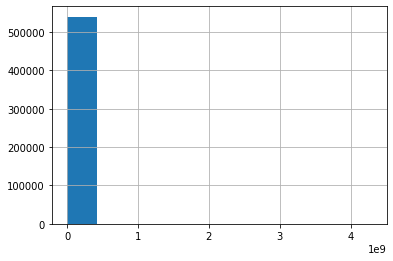

In [172]:
df['price'].hist()

In [173]:
def standarise(column,pct,pct_lower):
    sc = StandardScaler() 
    y = df[column][df[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [274]:
def fit_distribution(column,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [275]:
fit_distribution('price',0.99,0.01)

(0.7786851022594203, -1.198235857820143, 1.03963830924899)

(-4.814288240719972e-17, 0.9999999999999998)

(86703363.55491117, 63091898.941362604, 63091899.38345014)

(0.7170989753199725, 4.615078840352905, -1.198235857820143, 8.850807067529441)

(0.4541490688562667, -1.642608144474159, 3.6168843122211163)

(-1.1982358578201429, 4.985136017443064)

(0.7648522174558796, -1.198235857820143, 1.2785837768067734)

(-1.1982358578201429, 1.1982358578201429)

(0.6628556968105415, -1.5683635176950934, 1.2758484576744857)

(3.335782026303832, 4.385338367334596e-17, 1.9985268188945935)

(7.21394955877492e-11, -1.1982358583342223, 5.060292357862597)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
7         expon     23435.0
4      invgauss     28673.0
8       lognorm     31736.0
3          beta     55657.0
2   weibull_max    104936.0
0   weibull_min    151888.0
10       triang    181640.0
6         gamma    202262.0
1          no

In [224]:
y_std,len_y,y = standarise('price',0.99,0.01)

Text(0, 0.5, 'Frequency')

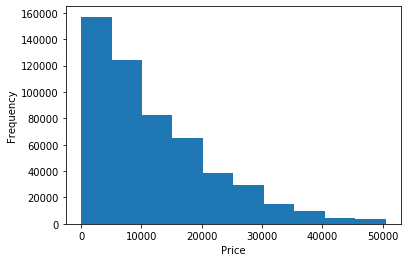

In [277]:
plt.hist(y)
plt.xlabel('Price')
plt.ylabel('Frequency')

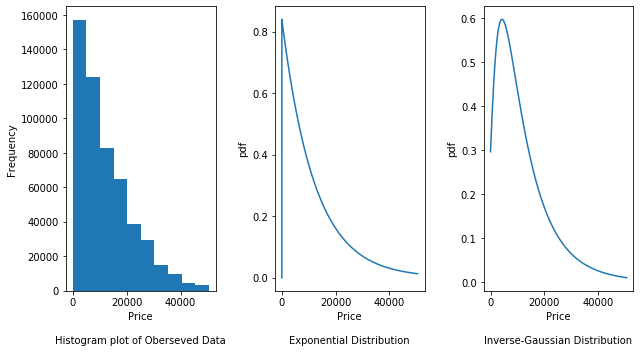

In [309]:
# f = plt.figure()
# plt.subplot(y,expon.pdf(y_std,-1.19, 1.19))
# plt.subplot(y,invgauss.pdf(y_std,0.45, -1.64, 3.61))
# f.show()


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes[0].hist(y)
axes[0].set_xlabel('Price\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(y,expon.pdf(y_std,-1.19, 1.19))
axes[1].set_xlabel('Price\n\nExponential Distribution')
axes[1].set_ylabel('pdf')
axes[2].plot(y,invgauss.pdf(y_std,0.45, -1.64, 3.61))
axes[2].set_xlabel('Price\n\nInverse-Gaussian Distribution')
axes[2].set_ylabel('pdf')
fig.tight_layout()

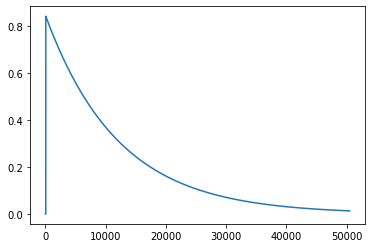

In [288]:
f = plt.figure()
plt.plot(y,expon.pdf(y_std,-1.19, 1.19))
f.show()

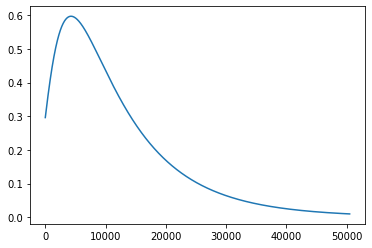

In [289]:
f = plt.figure()
plt.plot(y,invgauss.pdf(y_std,0.45, -1.64, 3.61))
f.show()

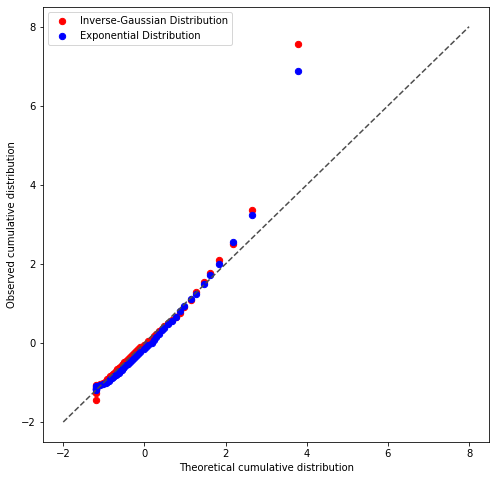

In [363]:
data_points = expon.rvs(-1.19, 1.19, size=2000)   
data_points2 = invgauss.rvs(0.45, -1.64, 3.61,size = 2000) 

f, ax = plt.subplots(figsize=(8,8))
ax.plot([-2, 8], [-2, 8], ls="--", c=".3")

percentile_bins = np.linspace(0,100,51)
percentile_cutoffs1 = np.percentile(y_std, percentile_bins)
percentile_cutoffs_expon= np.percentile(data_points, percentile_bins)


percentile_cutoffs_invgauss = np.percentile(data_points2, percentile_bins)


ax.scatter(percentile_cutoffs1,percentile_cutoffs_invgauss,c='r',label = 'Inverse-Gaussian Distribution',s = 40)
ax.scatter(percentile_cutoffs1,percentile_cutoffs_expon,c='b',label = 'Exponential Distribution',s = 40)


ax.set_xlabel('Theoretical cumulative distribution')
ax.set_ylabel('Observed cumulative distribution')
ax.legend()
plt.show()


In [364]:
fit_distribution('odometer',0.99,0.01)

(0.9696807288709375, -1.67228053164132, 1.375701959204389)

(4.210935540470258e-18, 1.0)

(8.101114452662557, 6.752957999416346, 7.17473078872049)

(1.5111609633771699, 2.9428574390909983, -1.712121634564888, 5.022935095746597)

(0.07830572374637769, -3.6751693278103454, 46.933598370696)

(-1.6722805316413198, 4.782955333779914)

(4.4508779136019125, -2.2084374125342796, 0.49618004567769597)

(-1.6722805316413198, 1.6722805316413198)

(0.26028020360442905, -3.87145770061924, 3.7438527721792125)

(0.9480147787518206, 4.137898126574288e-18, 1.0468070118276653)

(0.12388009897125515, -1.7967712548899337, 4.908020533304843)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
3          beta      1605.0
10       triang      4348.0
9      pearson3     11365.0
6         gamma     11366.0
4      invgauss     16054.0
8       lognorm     18081.0
2   weibull_max     22206.0
1          norm     54843.0
7         expon    179014.0
5 

In [189]:
lst,len_lst,org_lst = standarise('odometer',0.99,0.01)

In [191]:
org_lst[:20]

[42.0,
 42.0,
 42.0,
 42.0,
 42.0,
 42.0,
 42.0,
 42.0,
 42.0,
 42.0,
 43.0,
 43.0,
 43.0,
 43.0,
 43.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0]

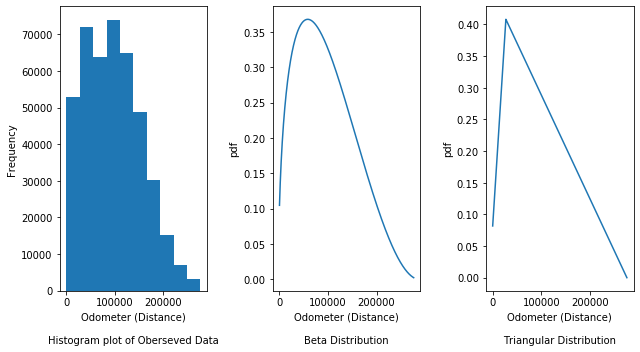

In [370]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes[0].hist(org_lst)
axes[0].set_xlabel('Odometer (Distance)\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(org_lst,beta.pdf(lst,1.51, 2.94, -1.71, 5.02))
axes[1].set_xlabel('Odometer (Distance)\n\nBeta Distribution')
axes[1].set_ylabel('pdf')
axes[2].plot(org_lst,triang.pdf(lst,.12, -1.79, 4.90))
axes[2].set_xlabel('Odometer (Distance)\n\nTriangular Distribution')
axes[2].set_ylabel('pdf')
fig.tight_layout()

(array([52762., 71881., 63841., 73948., 65034., 48810., 30165., 15302.,
         6957.,  3268.]),
 array([4.200000e+01, 2.769340e+04, 5.534480e+04, 8.299620e+04,
        1.106476e+05, 1.382990e+05, 1.659504e+05, 1.936018e+05,
        2.212532e+05, 2.489046e+05, 2.765560e+05]),
 <a list of 10 Patch objects>)

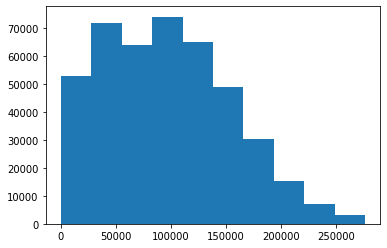

In [188]:
plt.hist(org_lst)

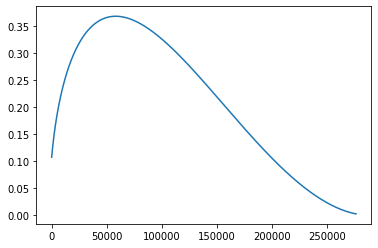

In [192]:
f = plt.figure()
plt.plot(org_lst,beta.pdf(lst,1.5111609633771699, 2.9428574390909983, -1.712121634564888, 5.022935095746597))
f.show()

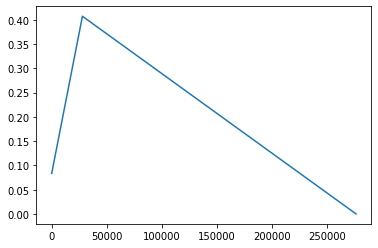

In [193]:
f = plt.figure()
plt.plot(org_lst,triang.pdf(lst,.12388009897125515, -1.7967712548899337, 4.908020533304843))
f.show()

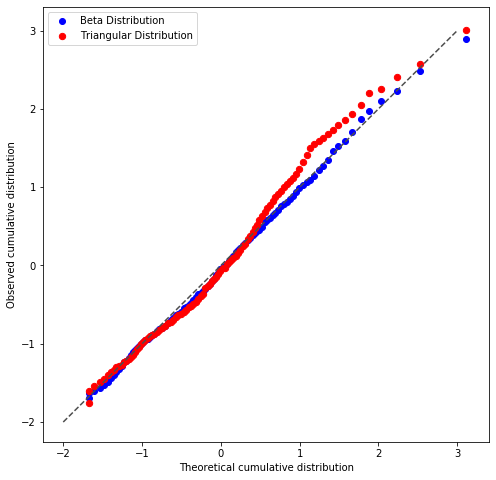

In [371]:
data_points = beta.rvs(1.51, 2.94, -1.71, 5.02,size = 1000)    
  
data_points2 = triang.rvs(.12, -1.79, 4.90,size = 1000) 

f, ax = plt.subplots(figsize=(8,8))
ax.plot([-2, 3], [-2, 3], ls="--", c=".3")

percentile_bins = np.linspace(0,100,101)
percentile_cutoffs1 = np.percentile(lst, percentile_bins)
percentile_cutoffs_beta = np.percentile(data_points, percentile_bins)


percentile_cutoffs_triang = np.percentile(data_points2, percentile_bins)
# print(percentile_cutoffs1,percentile_cutoffs2)

ax.scatter(percentile_cutoffs1,percentile_cutoffs_beta,c='b',label = 'Beta Distribution')
ax.scatter(percentile_cutoffs1,percentile_cutoffs_triang,c='r',label = 'Triangular Distribution',s = 40)


ax.set_xlabel('Theoretical cumulative distribution')
ax.set_ylabel('Observed cumulative distribution')
ax.legend()
plt.show()
